In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [9]:
df_IL = df[df['job_country'] == 'Israel']
df_IL_plot = df_IL['job_location'].value_counts().head(11).to_frame()
df_IL_plot

,count
job_location,
"Tel Aviv-Yafo, Israel",2557
Israel,503
"Herzliya, Israel",374
"Ramat Gan, Israel",239
"Petah Tikva, Israel",212
Anywhere,172
"Haifa, Israel",154
"Netanya, Israel",70
"Ra'anana, Israel",61


<Axes: xlabel='count', ylabel='job_location'>

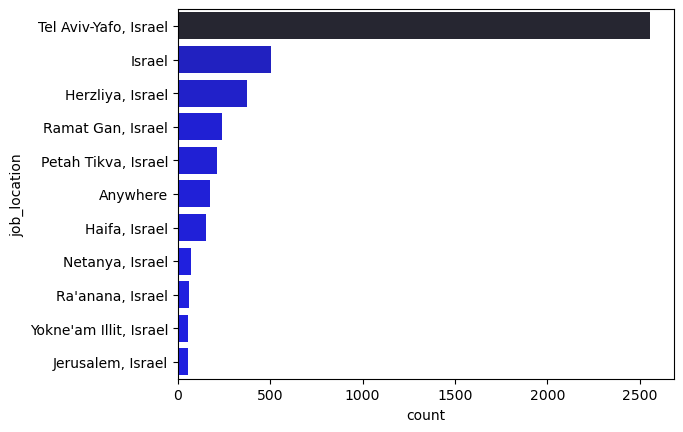

In [13]:
sns.barplot(data=df_IL_plot,x='count',y='job_location', hue='count',palette='dark:b_r',legend=False)

In [16]:
df_IL_Company = df_IL['company_name'].value_counts().head(20).to_frame()
df_IL_Company

,count
company_name,
G-STAT,104
Gotfriends,84
monday.com,78
LSports,65
ironSource,55
VAST Data,54
AppsFlyer,52
Varonis,52
Apple,50


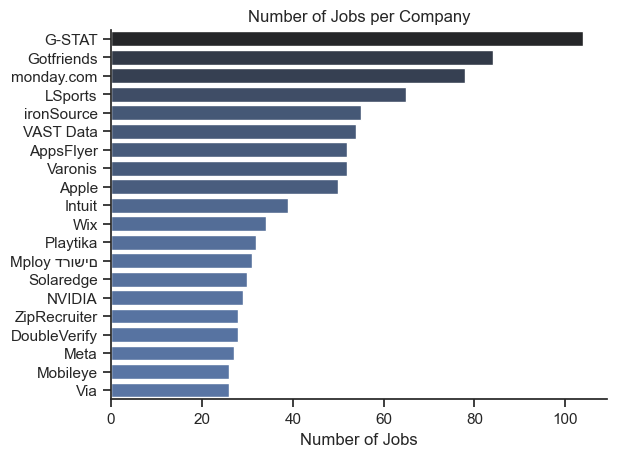

In [17]:
sns.set_theme(style='ticks')
sns.barplot(data=df_IL_Company, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

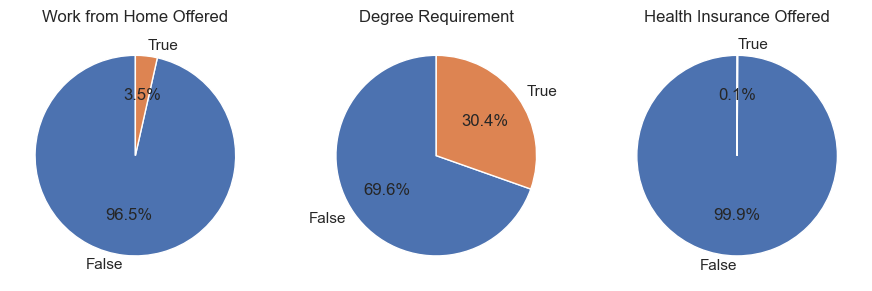

In [20]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}
sns.set_theme(style='ticks')
fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_IL[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()
